<a href="https://colab.research.google.com/github/Mercymerine/Amdari21DayDataChallenge/blob/main/jewellery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Set visualization theme
sns.set()

In [3]:
data = pd.read_csv('/content/Jewelry_Dataset.csv')
data.columns = [
    'Order_datetime',
    'Order_ID',
    'Product_ID',
    'SKU_Quantity',
    'Category_ID',
    'Category_alias',
    'Brand_ID',
    'Price_USD',
    'User_ID',
    'Target_Gender',
    'Main_color',
    'Main_metal',
    'Main_gem'
]
data.head()

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category_alias,Brand_ID,Price_USD,User_ID,Target_Gender,Main_color,Main_metal,Main_gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [4]:
#Check for missing values
data.isnull().sum()

Order_datetime        0
Order_ID              0
Product_ID            0
SKU_Quantity          0
Category_ID        5352
Category_alias     9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_color         7660
Main_metal         5462
Main_gem          34058
dtype: int64

In [5]:
#Data shape
data.shape

(95910, 13)

From this we can see that the last three columns must be of categorical type nad the SKU_quantity reaaly is not of any value since it is is not varied rather invaried.

In [6]:
# Feature cardinality
data.nunique()

Order_datetime    74504
Order_ID          74759
Product_ID         9613
SKU_Quantity          1
Category_ID          25
Category_alias      218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_color            5
Main_metal            3
Main_gem             30
dtype: int64

From this we automatically know that the most important column is the price column

In [7]:
#Data description
data.describe()

,Order_ID,Product_ID,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category_alias  85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_color      88250 non-null  object 
 11  Main_metal      90448 non-null  object 
 12  Main_gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [11]:
#Check for duplicates
data.duplicated().sum()

2589

One unique value has a constant value thus no new piece of information can be added.

In [16]:
#Features with a cardinality of 1 (invariant features)
invariant_features = data.nunique()[data.nunique() == 1].index.tolist()
invariant_features

['SKU_Quantity']

Label distribution is important in a classification model it ensures there is no imbaance but in our the regression task to check for the skew, this distribution makes it hard to learn about other prices.

In [17]:
# Check for label distributions
data['Price_USD'].skew()

18.95906072625981


Kurtosis is a statistical measure that describes the distribution of data points in a dataset. It indicates the extent to which data points cluster around the mean. Specifically, kurtosis measures the "tailedness" of the distribution—how heavy or light the tails are compared to a normal distribution.

There are three types of kurtosis:

Mesokurtic: This is the kurtosis of a normal distribution, which has a kurtosis value of 0 (excess kurtosis).
Leptokurtic: Distributions with positive kurtosis (> 0) have heavy tails and a sharp peak. This means there are more extreme values (outliers) than a normal distribution.
Platykurtic: Distributions with negative kurtosis (< 0) have light tails and a flatter peak. This indicates fewer extreme values compared to a normal distribution.

In [22]:
#Price Kurtosis
data['Price_USD'].kurtosis()

1054.8979068506155

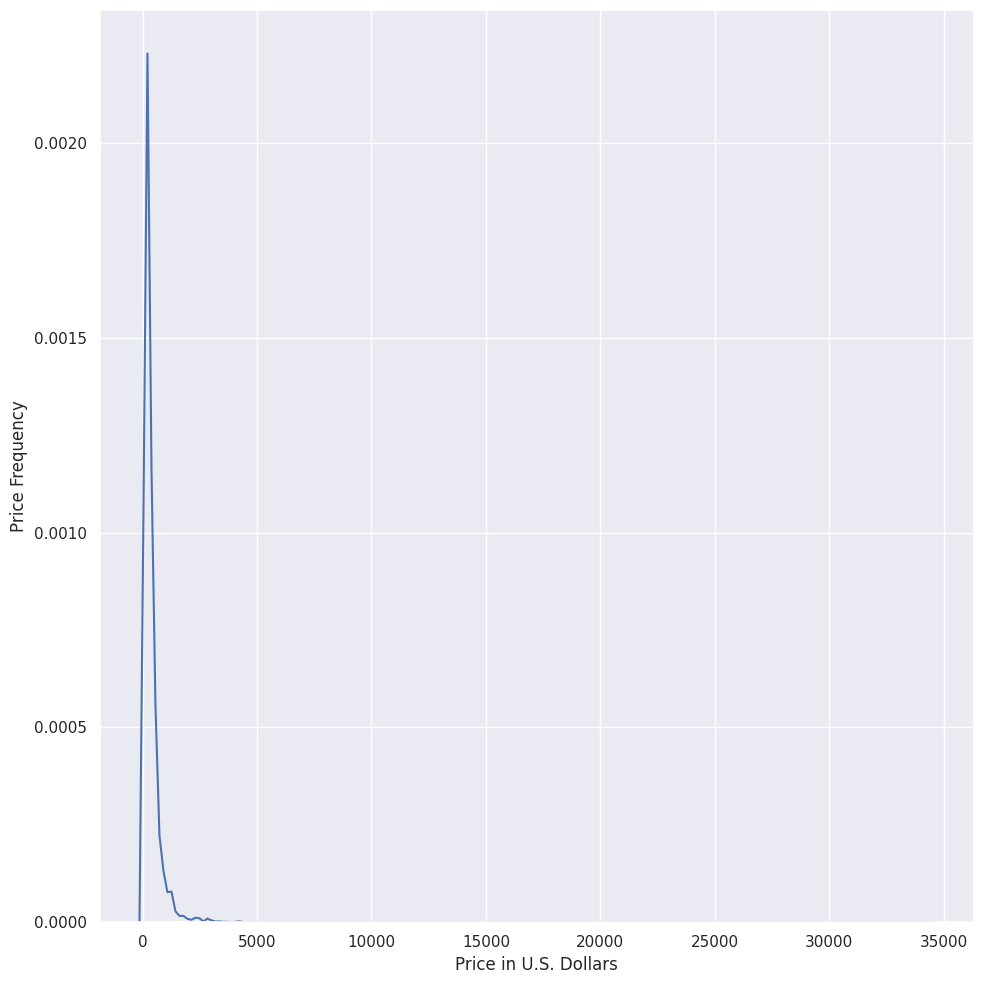

In [21]:
#Visualize distributions
plt.figure(figsize=(10, 10))
sns.kdeplot(data=data, x='Price_USD')

plt.xlabel("Price in U.S. Dollars")
plt.ylabel("Price Frequency")

plt.tight_layout()
plt.show();plt.close()